# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
!pip freeze

asn1crypto==0.22.0
beautifulsoup4==4.5.3
bkcharts==0.2
bleach==1.5.0
bokeh==0.12.6
certifi==2017.7.27.1
cffi==1.10.0
chardet==3.0.4
click==6.7
cloudpickle==0.2.2
conda==4.3.23
cryptography==1.9
cycler==0.10.0
Cython==0.25.2
dask==0.15.2
decorator==4.0.10
dill==0.2.6
distributed==1.18.3
entrypoints==0.2.2
fastcache==1.0.2
google-api-python-client==1.5.5
h5py==2.6.0
heapdict==1.0.0
html5lib==0.9999999
httplib2==0.9.2
idna==2.5
ipykernel==4.5.0
ipython==5.1.0
ipython-genutils==0.1.0
ipywidgets==5.2.2
jedi==0.10.2
Jinja2==2.8
jsonschema==2.5.1
jupyter==1.0.0
jupyter-client==4.4.0
jupyter-console==5.0.0
jupyter-core==4.2.0
jupyterhub==0.7.2
jupyterlab==0.27.0
jupyterlab-launcher==0.4.0
llvmlite==0.16.0
locket==0.2.0
MarkupSafe==0.23
matplotlib==2.0.0
mistune==0.7.3
mplleaflet==0.0.5
mpmath==0.19
msgpack-python==0.4.8
nbconvert==4.2.0
nbformat==4.1.0
networkx==1.11
notebook==4.2.3
numba==0.31.0
numexpr==2.6.2
numpy==1.12.1
oauth2client==4.0.0
olefile==0.44
packaging==16.8
pamela==0.3.0
panda

In [62]:
import pandas as pd
import numpy as np
%matplotlib notebook
import datetime as dt
import time as time
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplleaflet

<IPython.core.display.Javascript object>


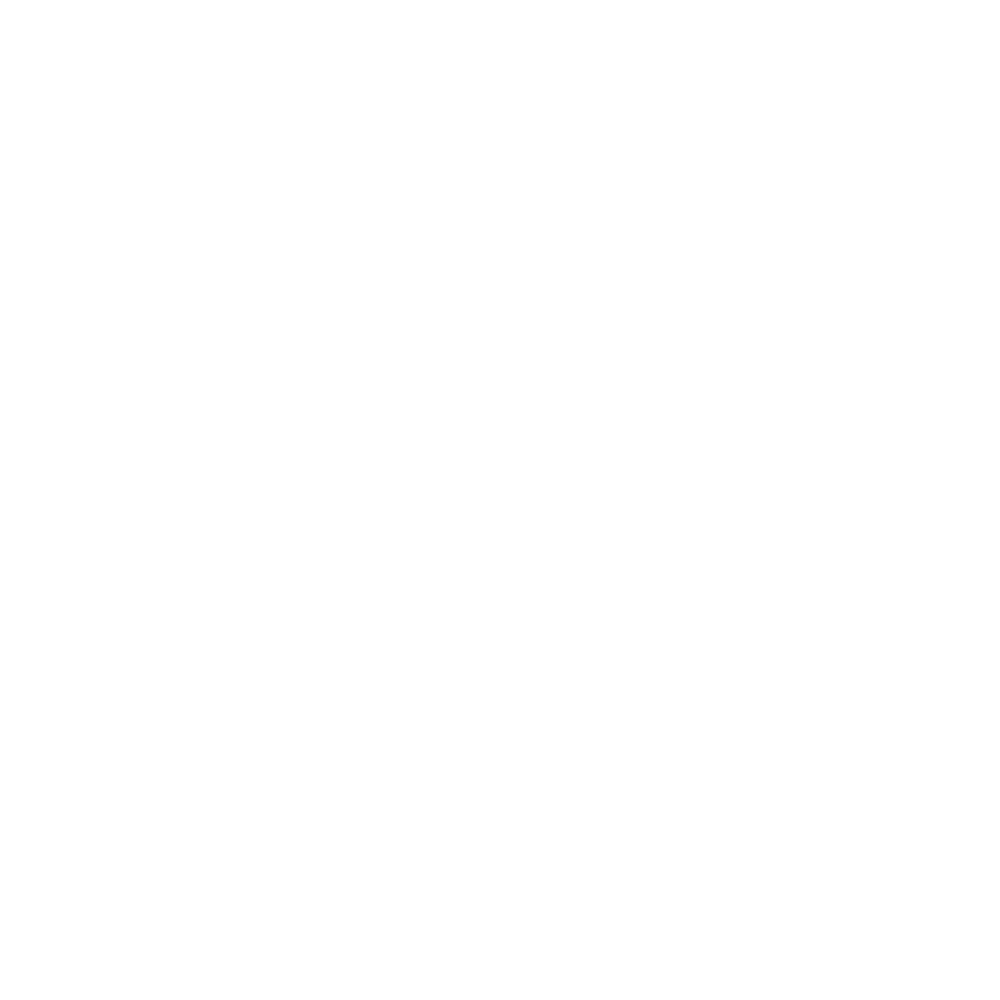

In [63]:
def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [138]:
# Dataframe reading 
weather_df=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv',\
                       index_col='Date',parse_dates=True,infer_datetime_format=True, date_parser=pd.to_datetime)
weather_df=weather_df.sort_index(level=0)#.set_index('ID',append=True)#.reset_index()
weather_df.head()

,ID,Element,Data_Value
Date,,,
2005-01-01,USW00004848,TMIN,0
2005-01-01,USC00207320,TMAX,150
2005-01-01,USC00207320,TMIN,-11
2005-01-01,USW00014833,TMIN,-44
2005-01-01,USW00014833,TMAX,33


In [139]:
# Converts Cº in tenth degrees to absolute Cº
def temp_rescale(df):
    # Mix and max Temperature values
    maxT=df['Data_Value'].max()/10
    minT=df['Data_Value'].min()/10
    
    period=np.unique(df.index.year)
    print('[TEMPERATURES {}-{}]\n  # Max Temp: {} Cº.\n  # Min Temp: {} Cº.'.format(period[0],period[-1],maxT,minT))
    
    # Temperature rescaling
    df['Data_Value'] /= 10
    return df

In [189]:
# Cleans Weather_df to organize it by day (without distiction of year) in given period 
def df_cleaned(weather_df):    
    
    # Grouping by day (without distiction of year) in given period 
    weather_year=temp_rescale(weather_df.copy()) #temperature rescaling to common ºC degrees
    
    # Taking mean by day (without distiction of year) in period 
    weather_year.set_index('Element',append=True,inplace=True)  # Setting TMAX and TMIN column as indexees
    weather_year = weather_year.groupby(level=[0,1]).mean() # Grouping by date and TM
    weather_year.reset_index(level=1,inplace=True) # Only Dates as indexes
    weather_year.index = weather_year.index.strftime('%m-%d') # Reformatting dates to 'mm-dd'
    weather_year = weather_year.sort_index() # Sorting by Date
    
    if ('02-29' in weather_year.index):
        weather_year=weather_year.drop('02-29')
    
    # finding Tmax and Tmin  
    weather_df_min=weather_year.groupby(level=0).min()['Data_Value']
    weather_df_max=weather_year.groupby(level=0).max()['Data_Value']
    
    
    return weather_year, weather_df_max, weather_df_min
        

In [190]:
weather_df_cleaned,weather_df_max, weather_df_min = df_cleaned(weather_df.drop(weather_df['2015'].index).copy())

[TEMPERATURES 2005-2014]
  # Max Temp: 40.6 Cº.
  # Min Temp: -30.6 Cº.


In [191]:
def getrecords_2015(weather_df):
    
    # Getting Data from year 2015
    weather_2015,_,_=df_cleaned(weather_df['2015'].copy())
    
    weather_2015.set_index('Element',append=True,inplace=True)
    weather_2015_max=weather_2015.groupby(level=[1]).get_group('TMAX').reset_index(level=1)['Data_Value'] 
    weather_2015_min=weather_2015.groupby(level=[1]).get_group('TMIN').reset_index(level=1)['Data_Value']
    
    # Records high &low in period 2005-2014
    weather_df_cleaned, weather_df_max, weather_df_min = df_cleaned(weather_df.drop(weather_df['2015'].index))
    
    # Tmax from 2015 > record_max[2004-20015]
    record_2015_tmax=weather_2015_max[weather_2015_max> weather_df_max]
    # Tmin from 2015 < record_min[2004-20015]
    record_2015_tmin=weather_2015_min[weather_2015_min < weather_df_min]
    
    return weather_2015,record_2015_tmax,record_2015_tmin

In [195]:
weather_2015, weather_2015_max, weather_2015_min = getrecords_2015(weather_df)

[TEMPERATURES 2015-2015]
  # Max Temp: 36.1 Cº.
  # Min Temp: -34.3 Cº.
[TEMPERATURES 2005-2014]
  # Max Temp: 40.6 Cº.
  # Min Temp: -30.6 Cº.


In [212]:
weather_dates_2015 = [dt.datetime.strptime(date,'%m-%d') for date in weather_2015_max.index]
weather_dates_2015

[datetime.datetime(1900, 4, 10, 0, 0),
 datetime.datetime(1900, 5, 7, 0, 0),
 datetime.datetime(1900, 5, 8, 0, 0),
 datetime.datetime(1900, 5, 9, 0, 0),
 datetime.datetime(1900, 5, 18, 0, 0),
 datetime.datetime(1900, 7, 27, 0, 0),
 datetime.datetime(1900, 7, 28, 0, 0),
 datetime.datetime(1900, 7, 29, 0, 0),
 datetime.datetime(1900, 8, 17, 0, 0),
 datetime.datetime(1900, 9, 7, 0, 0),
 datetime.datetime(1900, 9, 8, 0, 0),
 datetime.datetime(1900, 9, 9, 0, 0),
 datetime.datetime(1900, 9, 16, 0, 0),
 datetime.datetime(1900, 9, 17, 0, 0),
 datetime.datetime(1900, 9, 18, 0, 0),
 datetime.datetime(1900, 9, 28, 0, 0),
 datetime.datetime(1900, 10, 20, 0, 0),
 datetime.datetime(1900, 10, 21, 0, 0),
 datetime.datetime(1900, 11, 2, 0, 0),
 datetime.datetime(1900, 11, 3, 0, 0),
 datetime.datetime(1900, 11, 4, 0, 0),
 datetime.datetime(1900, 11, 5, 0, 0),
 datetime.datetime(1900, 11, 16, 0, 0),
 datetime.datetime(1900, 11, 17, 0, 0),
 datetime.datetime(1900, 11, 18, 0, 0),
 datetime.datetime(1900, 1

In [229]:
weather_dates = [np.datetime64('2015-'+date,'D') for date in weather_df_min.index]
weather_dates

[numpy.datetime64('2015-01-01'),
 numpy.datetime64('2015-01-02'),
 numpy.datetime64('2015-01-03'),
 numpy.datetime64('2015-01-04'),
 numpy.datetime64('2015-01-05'),
 numpy.datetime64('2015-01-06'),
 numpy.datetime64('2015-01-07'),
 numpy.datetime64('2015-01-08'),
 numpy.datetime64('2015-01-09'),
 numpy.datetime64('2015-01-10'),
 numpy.datetime64('2015-01-11'),
 numpy.datetime64('2015-01-12'),
 numpy.datetime64('2015-01-13'),
 numpy.datetime64('2015-01-14'),
 numpy.datetime64('2015-01-15'),
 numpy.datetime64('2015-01-16'),
 numpy.datetime64('2015-01-17'),
 numpy.datetime64('2015-01-18'),
 numpy.datetime64('2015-01-19'),
 numpy.datetime64('2015-01-20'),
 numpy.datetime64('2015-01-21'),
 numpy.datetime64('2015-01-22'),
 numpy.datetime64('2015-01-23'),
 numpy.datetime64('2015-01-24'),
 numpy.datetime64('2015-01-25'),
 numpy.datetime64('2015-01-26'),
 numpy.datetime64('2015-01-27'),
 numpy.datetime64('2015-01-28'),
 numpy.datetime64('2015-01-29'),
 numpy.datetime64('2015-01-30'),
 numpy.dat

<IPython.core.display.Javascript object>


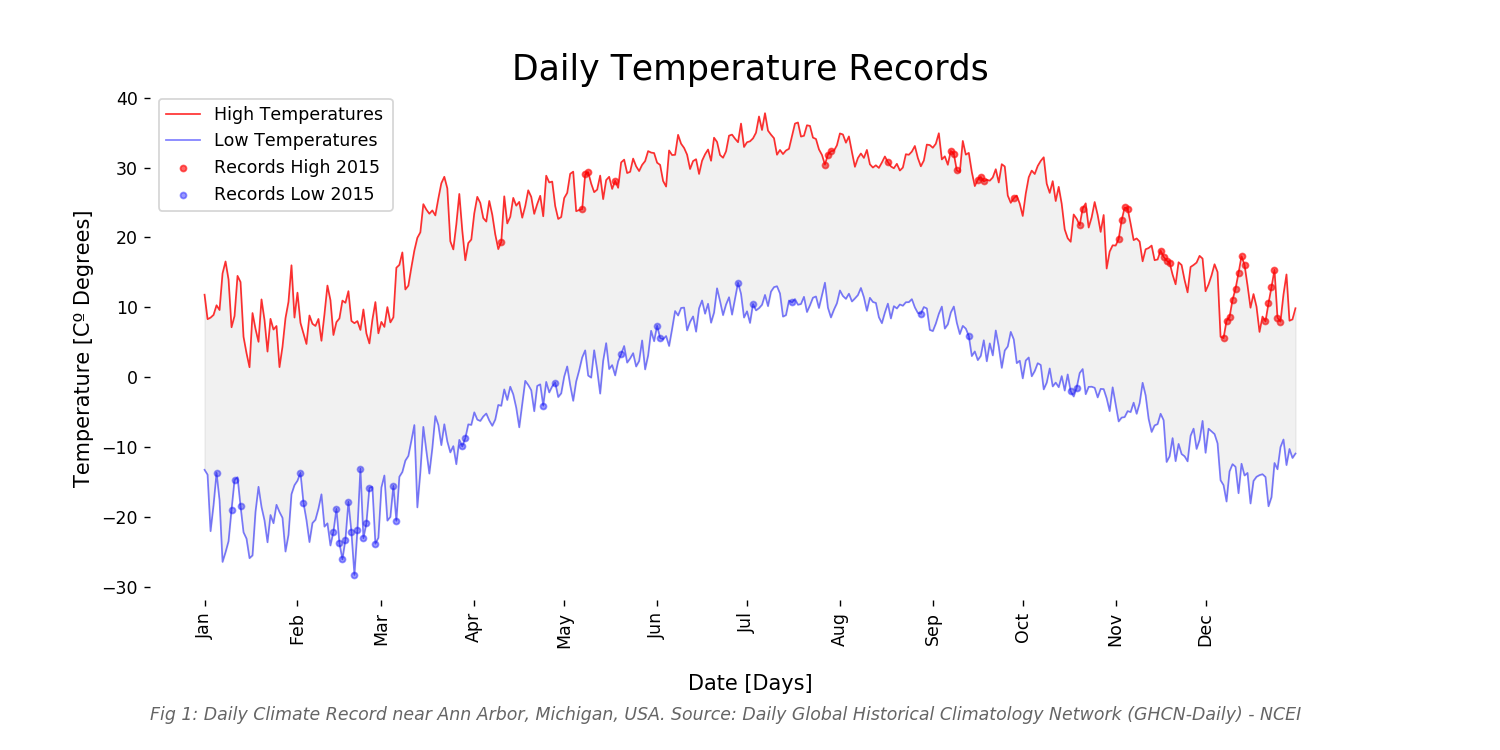

[TEMPERATURES 2005-2015]
  # Max Temp: 40.6 Cº.
  # Min Temp: -34.3 Cº.
[TEMPERATURES 2015-2015]
  # Max Temp: 36.1 Cº.
  # Min Temp: -34.3 Cº.
[TEMPERATURES 2005-2014]
  # Max Temp: 40.6 Cº.
  # Min Temp: -30.6 Cº.


In [35]:
def plot_weather(weather_df):
    plt.figure(num=1,figsize=[12,6])
    #axes=plt.gca()
    
    # Retrieving data for plotting
    weather_df_cleaned, weather_df_max , weather_df_min = df_cleaned(weather_df) # Tmin and Tmax line graphs
    # Parsing to datetime
    
    weather_dates = [np.datetime64('2015-'+date,'D') for date in weather_df_min.index]
    
    # line graph & scatter plot visualization
    plot_max,=plt.plot(weather_dates,weather_df_max,c='r',alpha=0.8,linewidth=1)
    plot_min,=plt.plot(weather_dates,weather_df_min,c='b',alpha=0.5,linewidth=1)
        # 2015 Records:
    _,weather_2015_max,weather_2015_min=getrecords_2015(weather_df)
    
    weather_dates_2015 =  [np.datetime64('2015-'+date,'D') for date in weather_2015_max.index]
    scatter_max=plt.scatter(weather_dates_2015,weather_2015_max.values,s=12,c='r',marker='o',alpha=0.6)
    
    weather_dates_2015 = [np.datetime64('2015-'+date,'D') for date in weather_2015_min.index]
    scatter_min=plt.scatter(weather_dates_2015,weather_2015_min.values,s=12,c='b',marker='o',alpha=0.4)
    
    
    # plotting properties
    plt.fill_between(weather_dates,weather_df_max,weather_df_min,color='gray',alpha=0.1)
    xticks_values = [dt.date(2015,month,1) for month in np.arange(1,13)]
    xticks_names = [dt.date(2015,month,1).strftime('%b') for month in np.arange(1,13)]
    plt.xticks(xticks_values,xticks_names,rotation=90)
    #plt.axis('tight')
    
    # Figure properties
        # Text in axis
    plt.title('Daily Temperature Records',fontsize=20)
    plt.xlabel('Date [Days]',labelpad=15,fontsize=12)
    plt.ylabel('Temperature [Cº Degrees] ',fontsize=12)
    
        # Plots legends
    ax=plt.gca()
    ax.legend([plot_max,plot_min,scatter_max,scatter_min],['High Temperatures','Low Temperatures','Records High 2015 ','Records Low 2015'])
    #ax.legend([plot_max,plot_min],['High Temperatures','Low Temperatures'])   
        # Figure legend
    
    plt.subplots_adjust(left=0.1,bottom=0.2)
    plt.figtext(0.1,0.04,'Fig 1: Daily Climate Record near Ann Arbor, Michigan, USA. Source: Daily Global Historical Climatology Network (GHCN-Daily) - NCEI',fontsize=10,fontstyle='italic',alpha=0.6)
    
    plt.box(False)
    
plot_weather(weather_df)

In [31]:
plt.savefig()

[numpy.datetime64('2015-01-01'),
 numpy.datetime64('2015-01-02'),
 numpy.datetime64('2015-01-03'),
 numpy.datetime64('2015-01-04'),
 numpy.datetime64('2015-01-05'),
 numpy.datetime64('2015-01-06'),
 numpy.datetime64('2015-01-07'),
 numpy.datetime64('2015-01-08'),
 numpy.datetime64('2015-01-09'),
 numpy.datetime64('2015-01-10'),
 numpy.datetime64('2015-01-11'),
 numpy.datetime64('2015-01-12'),
 numpy.datetime64('2015-01-13'),
 numpy.datetime64('2015-01-14'),
 numpy.datetime64('2015-01-15'),
 numpy.datetime64('2015-01-16'),
 numpy.datetime64('2015-01-17'),
 numpy.datetime64('2015-01-18'),
 numpy.datetime64('2015-01-19'),
 numpy.datetime64('2015-01-20'),
 numpy.datetime64('2015-01-21'),
 numpy.datetime64('2015-01-22'),
 numpy.datetime64('2015-01-23'),
 numpy.datetime64('2015-01-24'),
 numpy.datetime64('2015-01-25'),
 numpy.datetime64('2015-01-26'),
 numpy.datetime64('2015-01-27'),
 numpy.datetime64('2015-01-28'),
 numpy.datetime64('2015-01-29'),
 numpy.datetime64('2015-01-30'),
 numpy.dat